In [42]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle']='-'
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 0.7
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.markerscale"] = 3

In [28]:
parent_dir = '/Volumes/Kingcess/NBODY6/' 
hdf5_filepath = os.path.join(parent_dir, 'snapdata.hdf5')

log_filenames = ['0_output.dat','1_output.dat','2_output.dat','3_output.dat','4_output.dat']
log_filepath = []
for f in log_filenames:
    log_filepath.append(os.path.join(parent_dir, f))

In [30]:
#### RUN BH_data_mp.py #####

In [32]:
df = pd.read_csv('bh_history.csv')
df = df.sort_values(by='time_myr')
totm_bh = df.groupby('time_myr')['mass_msun'].sum()
time_gyr = totm_bh.index/1e3
totn_bh = df.groupby('time_myr')['bh_id'].count()
maxm_bh = df.groupby('time_myr')['mass_msun'].max()

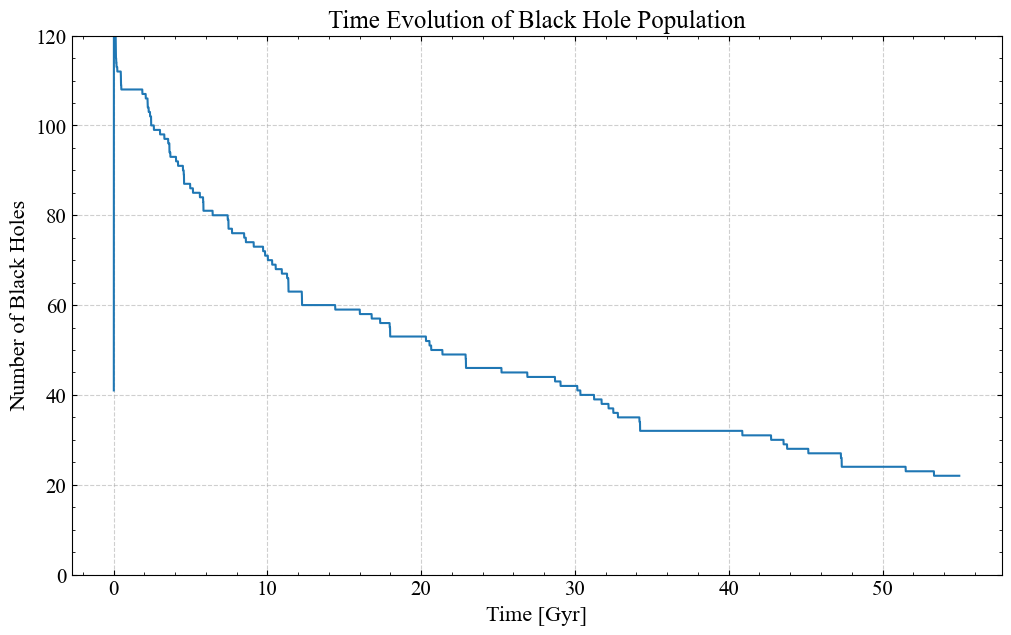

In [34]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(time_gyr, totn_bh, linestyle='-')
ax.set_title('Time Evolution of Black Hole Population', fontsize=18)
ax.set_xlabel('Time [Gyr]', fontsize=16)
ax.set_ylabel('Number of Black Holes', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(0,120)
# ax.set_xscale('log')
# ax.set_yscale('log')
# file_path = os.path.join('/Users/gaku/work/2025_summer_RA','count_BH.png')
# plt.savefig(file_path,bbox_inches='tight',dpi=300)
plt.show()

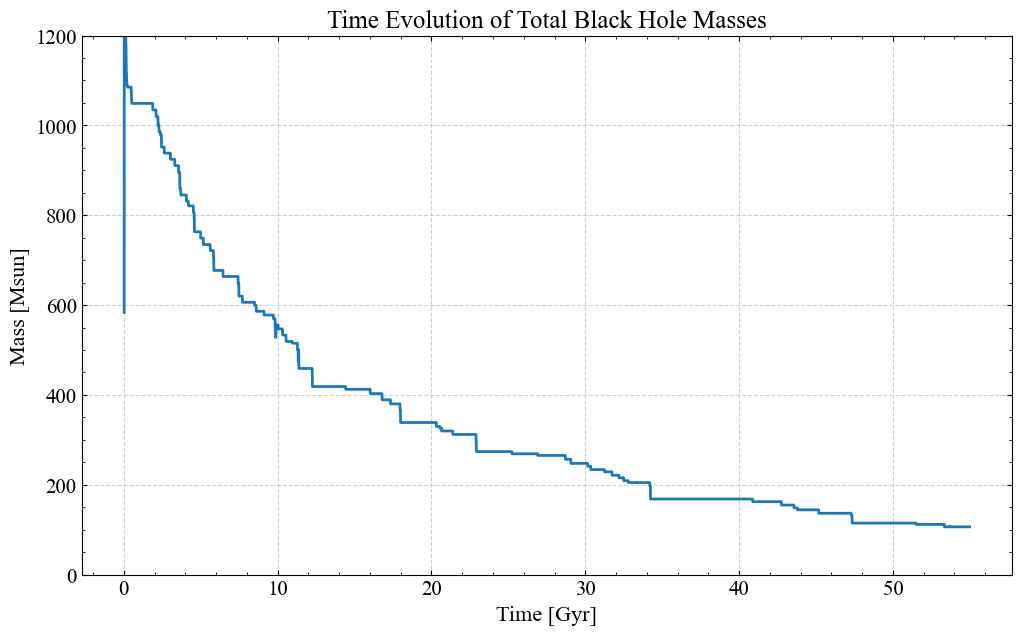

In [36]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(time_gyr, totm_bh, lw=2)
ax.set_title('Time Evolution of Total Black Hole Masses', fontsize=18)
ax.set_xlabel('Time [Gyr]', fontsize=16)
ax.set_ylabel('Mass [Msun]', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(0,1200)
# ax.set_xscale('log')
# ax.set_yscale('log')
# file_path = os.path.join('/Users/gaku/work/2025_summer_RA','mtot_BH.png')
# plt.savefig(file_path,bbox_inches='tight',dpi=300)
plt.show()

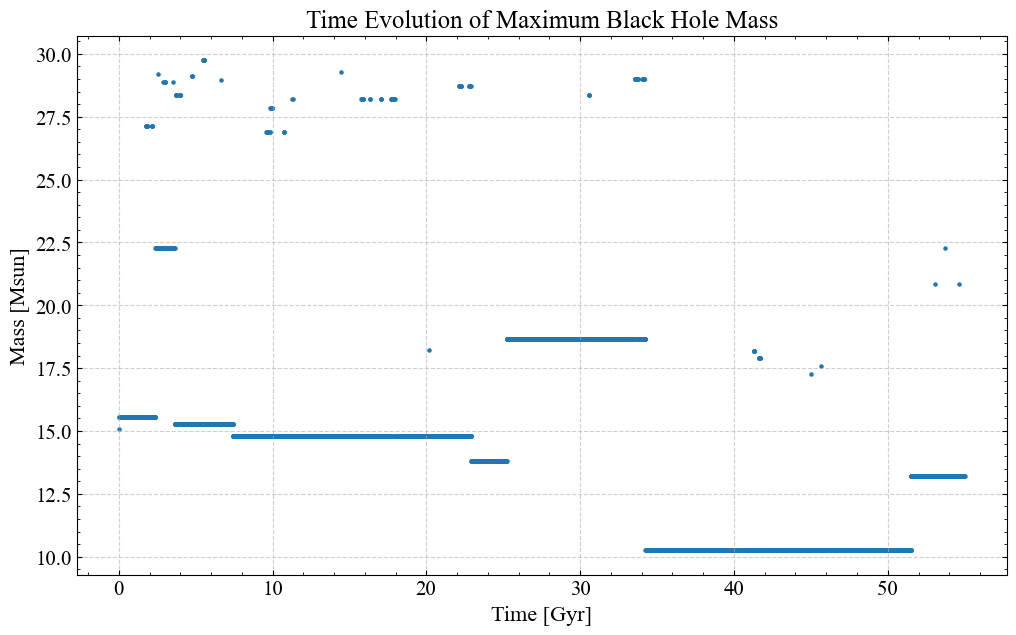

In [38]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(time_gyr, maxm_bh,s=5)
ax.set_title('Time Evolution of Maximum Black Hole Mass', fontsize=18)
ax.set_xlabel('Time [Gyr]', fontsize=16)
ax.set_ylabel('Mass [Msun]', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.6)
# ax.set_xscale('log')
# ax.set_yscale('log')
file_path = os.path.join('/Users/gaku/work/2025_summer_RA','mmax_BH.png')
plt.savefig(file_path,bbox_inches='tight',dpi=300)
plt.show()

In [44]:
all_events_data = []
filenames = sorted(glob.glob(os.path.join(parent_dir, '*_output.dat')))

for name in filenames:
    with open(name, 'r', errors='replace') as file:
        for line in file:
            if line[10:14] == 'TIME':
                try:
                    time = float(line[16:24].strip())
                except ValueError:
                    pass

            if line[1+7:7+7] == 'ESCAPE' and line[45+7:47+7] == '14' and line[48+7:50+7] == '14':
                try:
                    event_info = {
                        'time_list': time,
                        'event_list': 'BH ESCAPE',
                        'm1_list': float(line[62+7:66+7].strip()),
                        'm2_list': float(line[67+7:72+7].strip()),
                        'id1_list': int(line[26+7:32+7].strip()),
                        'id2_list': int(line[32+7:39+7].strip()),
                        'P_list': float(line[143+7:150+7].strip()),
                        'id1_ej': int(line[26+7:32+7].strip()),
                        'id2_ej': int(line[32+7:39+7].strip()),
                        'time_list_escape': time,
                        'id1_list_escape': int(line[26+7:32+7].strip()),
                        'id2_list_escape': int(line[32+7:39+7].strip()),
                    }
                    all_events_data.append(event_info)
                except (ValueError, IndexError):
                    pass

            elif line[1:9] == 'EXCHANGE':
                try:
                    event_info = {
                        'time_list': time,
                        'event_list': 'EXCHANGE',
                        'id1_list': int(line[45:51].strip()),
                        'id2_list': int(line[51:57].strip()),
                        'id3_list': int(line[57:63].strip()),
                        'id4_list': int(line[63:69].strip()),
                    }
                    all_events_data.append(event_info)
                except (ValueError, IndexError):
                    pass

            elif line[8:12] == "COAL":
                try:
                    event_info = {
                        'time_list': time,
                        'event_list': 'MERGE',
                        'm1_list': float(line[64:69].strip()),
                        'id1_list': int(line[31:37].strip()),
                        'id2_list': int(line[37:43].strip()),
                    }
                    all_events_data.append(event_info)
                except (ValueError, IndexError):
                    pass

df_out = pd.DataFrame(all_events_data)

final_columns = [
    'time_list', 'event_list', 'm1_list', 'm2_list', 'id1_list', 
    'id2_list', 'id3_list', 'id4_list', 'P_list', 'id1_ej', 'id2_ej',
    'time_list_escape', 'id1_list_escape', 'id2_list_escape'
]

df_out = df_out.reindex(columns=final_columns)

# df_out.to_csv('bh_events.csv', index=False)

In [45]:
exchange_events = df_out[df_out['event_list'] == 'EXCHANGE']
escape_events = df_out[df_out['event_list'] == 'BH ESCAPE']
merge_events = df_out[df_out['event_list'] == 'MERGE']

In [48]:
print(exchange_events[['time_list','event_list','id1_list','id2_list','id3_list','id4_list',]])

    time_list event_list  id1_list  id2_list  id3_list  id4_list
0      2067.0   EXCHANGE    108659    143871  108659.0  165870.0
1      2079.0   EXCHANGE    165870    108659  108659.0  143871.0
2      2079.0   EXCHANGE    108659    143871  108659.0  165870.0
3      2229.0   EXCHANGE    108659    165870  108659.0    3838.0
6      2748.0   EXCHANGE    108659      3838    3838.0  178606.0
..        ...        ...       ...       ...       ...       ...
83    41714.0   EXCHANGE    104983     70657  104983.0  166318.0
84    42939.0   EXCHANGE    104983    166318  166318.0  159191.0
85    45445.0   EXCHANGE    159191     70657  159191.0    5720.0
88    52205.0   EXCHANGE    104983     70657   70657.0   29650.0
89    52360.0   EXCHANGE    104983    110088  104983.0   70657.0

[76 rows x 6 columns]


In [50]:
print(escape_events[['time_list','event_list','id1_list','id2_list','m1_list','m2_list','P_list']])

    time_list event_list  id1_list  id2_list  m1_list  m2_list   P_list
5      2445.0  BH ESCAPE     26636      2404     13.7     13.4    0.047
11     3631.0  BH ESCAPE     60751    178606     13.5     22.3  210.000
13     4583.0  BH ESCAPE    115438     36532     14.3     15.2   94.000
23     5845.0  BH ESCAPE    108718     75833     15.2     14.5  240.000
32     7477.0  BH ESCAPE     11293      3838     13.7     14.7  530.000
56    11373.0  BH ESCAPE     83281    148002     13.7     14.5  280.000
58    12254.0  BH ESCAPE    169516    163001     13.4     13.4  120.000
67    17985.0  BH ESCAPE    154277     35807     13.4     13.7  350.000
72    22913.0  BH ESCAPE     26198    180878     14.8      9.5  350.000
80    34234.0  BH ESCAPE     23052    119272     18.7     10.3  150.000
86    47342.0  BH ESCAPE    159191      5720      9.7      7.9  140.000


In [52]:
print(merge_events[['time_list', 'event_list', 'id1_list', 'id2_list', 'm1_list']])

    time_list event_list  id1_list  id2_list  m1_list
4      2377.0      MERGE     86307    178606    22.28
73    25222.0      MERGE     23052     64104    18.67
87    51507.0      MERGE    104983    163177    13.21
